In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3-1. 파일 준비하기
- data_day_2016.xlsx, data_day_2017.xlsx, data_day_2018.xlsx, data_day_2019.xlsx 파일을 가져와 df로 합치기작업
- 각 파일에 기록되어 있는 내용
    - 측정일시, 측정소명, 이산화질소농도, 오존농도, 이산화탄소농도, 아황산가스, 미세먼지, 초미세먼지의 측정치

In [ ]:
#  './data_01/data_day_2016.xlsx' 파일을 가져와 df2016이라는 이름을 부여
df2016 = pd.read_excel('./data_01/data_day_2016.xlsx', engine='openpyxl')
df2016.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,0.047,0.006,0.8,0.006,73.0,44.0
1,20160101,강남대로,0.054,0.004,1.2,0.009,85.0,52.0


In [ ]:
# './data_01/data_day_2017.xlsx' 파일을 가져와 df2017이라는 이름을 부여
df2017 = pd.read_excel('./data_01/data_day_2017.xlsx') #, engine='openpyxl')
df2017.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20170101,강남구,0.040,0.002,0.8,0.005,80.0,58.0
1,20170101,강남대로,0.082,0.005,1.4,0.007,83.0,58.0


In [ ]:
# './data_01/data_day_2018.xlsx' 파일을 가져와 df2018이라는 이름을 부여합니다.
df2018 = pd.read_excel('./data_01/data_day_2018.xlsx') #, engine='openpyxl')
df2018.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20180101,강남구,0.033,0.010,0.6,0.006,34.0,22.0
1,20180101,강남대로,0.040,0.007,0.8,0.006,NaN,17.0


In [ ]:
# './data_01/data_day_2019.xlsx' 파일을 가져와 df2019라는 이름을 부여합니다.
df2019 = pd.read_excel('./data_01/data_day_2019.xlsx') #, engine='openpyxl')
df2019.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20200818,강남구,0.022,0.006,0.4,0.003,28.0,21.0
1,20200818,강남대로,0.017,0.005,0.6,0.003,25.0,11.0


In [ ]:
temp1 = pd.DataFrame({'A': [1, 2],
                     'B': [3, 4]})
temp2 = pd.DataFrame({'A': [5, 6],
                     'B': [7, 8]})
pd.concat([temp1, temp2])

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


In [ ]:
temp1 = pd.DataFrame({'A': [1, 2],
                     'B': [3, 4]})
temp2 = pd.DataFrame({'C': [5, 6],
                     'D': [7, 8]})
pd.concat([temp1, temp2], axis=1)

,A,B,C,D
0,1,3,5,7
1,2,4,6,8


In [ ]:
#  df2016, df2017, df2018, df2019를 합쳐 한 개의 DataFrame으로 만들어 df라는 이름을 지정합니다.
dfList = [df2016, df2017, df2018, df2019]
df = pd.concat(dfList, axis=0)

df.shape

(60208, 9)

In [ ]:
import glob
glob.glob('data_01/data_day_*.xlsx')

['data_01/data_day_2017.xlsx',
 'data_01/data_day_2018.xlsx',
 'data_01/data_day_2019.xlsx',
 'data_01/data_day_2016.xlsx']

In [ ]:
sorted(glob.glob('data_01/data_day_*.xlsx'))

['data_01/data_day_2016.xlsx',
 'data_01/data_day_2017.xlsx',
 'data_01/data_day_2018.xlsx',
 'data_01/data_day_2019.xlsx']

In [ ]:
# 결측치 제거
# 앞에서 했던 작업에 대해서 다시 실행합니다. - 학습을 멈추었다 수행하는 경우
import glob
import pandas as pd
dfList = []
for x in sorted(glob.glob('data_01/data_day_*.xlsx')):
    temp = pd.read_excel(x)
    dfList.append(temp)

df = pd.concat(dfList, axis=0)
df.index = pd.RangeIndex(len(df))
df.insert(1, '측정일시2', pd.to_datetime(df['측정일시'], format='%Y%m%d'))
df['년'] = df['측정일시2'].dt.year
df['월'] = df['측정일시2'].dt.month
df['일'] = df['측정일시2'].dt.day
df2 = df.drop(columns=['측정일시2'])
df1 = df2.set_index('측정일시').sort_index()
df_dust = df1[['측정소명', '년', '월', '일','오존농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
df_dust = df_dust.reset_index()

In [ ]:
# df_dust 에서 ['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']에서
# 모든 데이터가 결측치인 행을 제거하여 결과를 temp1으로 저장합니다
temp1 = df_dust.dropna(how='all', subset=['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'])

print(len(df_dust) - len(temp1))

592


In [ ]:
#  df_dust 에서 ['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']에서
# 하나라도 결측치가 있는 행을 제거하여 결과를 temp2로 저장합니다.
temp2 = df_dust.dropna(how='any', subset=['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'])

print(len(df_dust) - len(temp2))

3359


In [ ]:
# df_dust 에서 ['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']에서
# 2개 이상의 데이터를 가진 행은 제거하지 않은 결과를 temp3로 저장합니다.
# (= 3개의 정보 중 1개의 데이터만 가진 행을 제거함)
temp3 = df_dust.dropna(thresh=2, subset=['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'])

print(len(df_dust) - len(temp3))

842


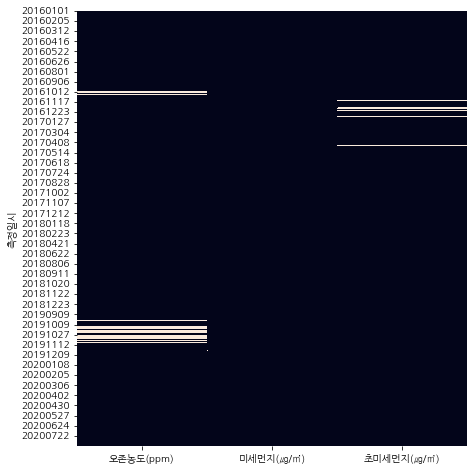

In [ ]:
#  temp1, temp2, temp3의 '오존농도(ppm)':'초미세먼지(㎍/㎥)'에 대한 결측치 heatmap을
# temp1, temp3는 부분적으로 결측치가 남아있고, temp2는 결측치가 없습니다.
plt.figure(figsize=(7, 8))
sns.heatmap(temp3.loc[:, '오존농도(ppm)':'초미세먼지(㎍/㎥)'].isna(), cbar=False)
plt.show()

In [ ]:
#  df_dust에서 '년', '월'별 '미세먼지(㎍/㎥)' 데이터의 평균을 구해
# DataFrame으로 만들어 meandf 라는 이름을 지정합니다.ㅣ
meandf = df_dust.groupby(['년', '월'])[['미세먼지(㎍/㎥)']].mean()
meandf

미세먼지(㎍/㎥)
년    월            
2016 1   52.693844
     2   48.283273
     3   66.799503
     4   73.327039
     5   58.624172
     6   47.872304
     7   35.531092
     8   37.124378
     9   40.013841
     10  40.191363
     11  54.729965
     12  50.693522
2017 1   55.719138
     2   49.554029
     3   64.532392
     4   59.582549
     5   66.029826
     6   43.878112
     7   36.667496
     8   24.564570
     9   36.624786
     10  32.496689
     11  45.322222
     12  52.992327
2018 1   53.998324
     2   55.842459
     3   43.815303
     4   52.001222
     5   40.376068
     6   49.719231
     7   26.415215
     8   23.940299
     9   21.652651
     10  30.030576
     11  53.707242
     12  43.704176
2019 8   27.714286
     9   22.069071
     10  31.012975
     11  40.752425
     12  42.162968
2020 1   43.070856
     2   41.949630
     3   46.351002
     4   45.610667
     5   36.477082
     6   38.060298
     7   22.118754
     8   22.322222

In [ ]:
meandf.unstack()

미세먼지(㎍/㎥)                                                         \
월            1          2          3          4          5          6    
년                                                                        
2016  52.693844  48.283273  66.799503  73.327039  58.624172  47.872304   
2017  55.719138  49.554029  64.532392  59.582549  66.029826  43.878112   
2018  53.998324  55.842459  43.815303  52.001222  40.376068  49.719231   
2019        NaN        NaN        NaN        NaN        NaN        NaN   
2020  43.070856  41.949630  46.351002  45.610667  36.477082  38.060298   

                                                                        
월            7          8          9          10         11         12  
년                                                                       
2016  35.531092  37.124378  40.013841  40.191363  54.729965  50.693522  
2017  36.667496  24.564570  36.624786  32.496689  45.322222  52.992327  
2018  26.415215  23.940299  21.652651  30.030576  53.707242  43.704176  
2019        NaN  27.714286  22.069071  31.012975  40.752425  42.162968  
2020  22.118754  22.322222        NaN        NaN        NaN        NaN

In [ ]:
# [3-35] meandf에서 2017년 6월까지의 데이터만 출력합니다.
meandf.loc[:(2017, 6), :]

미세먼지(㎍/㎥)
년    월            
2016 1   52.693844
     2   48.283273
     3   66.799503
     4   73.327039
     5   58.624172
     6   47.872304
     7   35.531092
     8   37.124378
     9   40.013841
     10  40.191363
     11  54.729965
     12  50.693522
2017 1   55.719138
     2   49.554029
     3   64.532392
     4   59.582549
     5   66.029826
     6   43.878112

In [ ]:
#  meandf에 '결측치제거후' 및 '차이'라는 컬럼을 추가합니다.
# '결측치제거후' 컬럼은 temp2에서 '년', '월'별 '미세먼지(㎍/㎥)' 데이터의 평균을 사용합니다.
# '차이' 컬럼은 '미세먼지(㎍/㎥)' - '결측치제거후' 를 사용합니다.
meandf['결측치제거후'] = temp2.groupby(['년', '월'])['미세먼지(㎍/㎥)'].mean()
meandf['차이'] = meandf['미세먼지(㎍/㎥)'] -  meandf['결측치제거후']

In [ ]:
# [3-37] meandf에서 2017년 6월까지의 데이터만 출력합니다.
# 여러 개의 값에 차이가 있는 것을 확인 할 수 있습니다.
meandf.loc[: (2017, 6), :]

미세먼지(㎍/㎥)     결측치제거후        차이
년    월                                 
2016 1   52.693844  52.693844  0.000000
     2   48.283273  48.283273  0.000000
     3   66.799503  66.799503  0.000000
     4   73.327039  73.327039  0.000000
     5   58.624172  58.571784  0.052388
     6   47.872304  47.872304  0.000000
     7   35.531092  35.417235  0.113857
     8   37.124378  37.147870 -0.023492
     9   40.013841  40.051304 -0.037464
     10  40.191363  40.128497  0.062867
     11  54.729965  53.557128  1.172837
     12  50.693522  50.028426  0.665095
2017 1   55.719138  55.638219  0.080919
     2   49.554029  49.554029  0.000000
     3   64.532392  64.580699 -0.048307
     4   59.582549  57.955078  1.627471
     5   66.029826  64.139216  1.890610
     6   43.878112  43.922865 -0.044753

### 3-5.결측치 대체 (평균값)

In [ ]:
import numpy as np
temp = pd.DataFrame({'A':[np.nan, 2, np.nan, 4],
                     'B':[7, 8, 9, 10],
                     'C':[1, 2, 4, 8]})
temp

,A,B,C
0,NaN,7,1
1,2.0,8,2
2,NaN,9,4
3,4.0,10,8


In [ ]:
# temp의 'A' 열에 대해서 결측치인 경우 'B'의 값으로 대체합니다.
temp['A'].mask(temp['A'].isna(), temp['B'])
#temp['A'].where(temp['A'].notna(), temp['B'])

0    7.0
1    2.0
2    9.0
3    4.0
Name: A, dtype: float64

In [ ]:
# temp의 'A' 열에 대해서 결측치인 경우 'C'의 값으로 대체합니다.
#temp['A'].mask(temp['A'].isna(), temp['C'])
temp['A'].where(temp['A'].notna(), temp['C'])

0    1.0
1    2.0
2    4.0
3    4.0
Name: A, dtype: float64

In [ ]:
# index가 변경됨
df_dust.groupby('측정일시')['미세먼지(㎍/㎥)'].mean()
#df_dust.groupby('측정일시')['미세먼지(㎍/㎥)'].agg('mean')

측정일시
20160101    70.736842
20160102    53.789474
20160103    98.861111
20160104    76.205128
20160105    34.333333
              ...    
20200814    31.660000
20200815    37.400000
20200816    22.380000
20200817    24.980000
20200818    27.080000
Name: 미세먼지(㎍/㎥), Length: 1403, dtype: float64

In [ ]:
# df_dust의 '측정일시' 별 '미세먼지(㎍/㎥)'의 평균을 구합니다.
# 이때, index 변경을 하지 않기 위해 transform을 사용하고, fine_dust라는 이름을 지정합니다.
fine_dust = df_dust.groupby('측정일시')['미세먼지(㎍/㎥)'].transform('mean')
fine_dust

0        70.736842
1        70.736842
2        70.736842
3        70.736842
4        70.736842
           ...    
60203    27.080000
60204    27.080000
60205    27.080000
60206    27.080000
60207    27.080000
Name: 미세먼지(㎍/㎥), Length: 60208, dtype: float64

In [ ]:
# [3-40] df_dust['미세먼지(㎍/㎥)'], fine_dust의 결측치 값의 개수를 구합니다.
df_dust['미세먼지(㎍/㎥)'].isna().sum(), fine_dust.isna().sum()

(881, 0)

In [ ]:
#  df_dust의 '미세먼지(㎍/㎥)'의 결측치를 fine_dust의 값으로 채우기 합니다.
# 채우기 한 결과를 다시 df_dust['미세먼지(㎍/㎥)']로 저장합니다.
s = df_dust['미세먼지(㎍/㎥)']
df_dust['미세먼지(㎍/㎥)'] = s.mask(s.isna(), fine_dust)

In [ ]:
# [3-42] df_dust의 컬럼별 결측치 개수를 확인하여 봅니다.
# 미세먼지에 대한 결측치가 제거 되었습니다.
df_dust.isna().sum()

측정일시             0
측정소명             0
년                0
월                0
일                0
오존농도(ppm)     2133
미세먼지(㎍/㎥)        0
초미세먼지(㎍/㎥)    1779
dtype: int64

In [ ]:
#  meandf에 '결측치대체' 및 '차이2'라는 컬럼을 추가합니다.
# '결측치대체' 컬럼은 df_dust에서 '년', '월' 별 '미세먼지(㎍/㎥)' 데이터의 평균을 사용합니다.
# '차이2' 컬럼은 meandf에서 '미세먼지(㎍/㎥)' - '결측치대체'를 사용합니다.
meandf['결측치대체'] = df_dust.groupby(['년', '월'])['미세먼지(㎍/㎥)'].mean()
meandf['차이2'] = meandf['미세먼지(㎍/㎥)'] - meandf['결측치대체']

In [ ]:
# [3-44] meandf에서 2017년 6월까지의 데이터만 출력합니다.
meandf.loc[:(2017, 6)]

미세먼지(㎍/㎥)     결측치제거후        차이      결측치대체       차이2
년    월                                                      
2016 1   52.693844  52.693844  0.000000  52.752104 -0.058261
     2   48.283273  48.283273  0.000000  48.293733 -0.010460
     3   66.799503  66.799503  0.000000  66.850594 -0.051091
     4   73.327039  73.327039  0.000000  73.478543 -0.151504
     5   58.624172  58.571784  0.052388  58.610857  0.013315
     6   47.872304  47.872304  0.000000  47.777946  0.094358
     7   35.531092  35.417235  0.113857  35.423542  0.107550
     8   37.124378  37.147870 -0.023492  37.107287  0.017091
     9   40.013841  40.051304 -0.037464  40.036313 -0.022472
     10  40.191363  40.128497  0.062867  40.244174 -0.052811
     11  54.729965  53.557128  1.172837  54.780218 -0.050252
     12  50.693522  50.028426  0.665095  50.714662 -0.021140
2017 1   55.719138  55.638219  0.080919  55.730312 -0.011174
     2   49.554029  49.554029  0.000000  49.554029  0.000000
     3   64.532392  64.580699 -0.048307  64.535588 -0.003196
     4   59.582549  57.955078  1.627471  59.576136  0.006413
     5   66.029826  64.139216  1.890610  66.012864  0.016962
     6   43.878112  43.922865 -0.044753  43.886280 -0.008168

In [ ]:
meandf['차이'].abs().sum(), meandf['차이2'].abs().sum()

(7.062269281823493, 2.7652830102051595)

In [ ]:
#  df_dust의 '오존농도(ppm)', '초미세먼지(㎍/㎥)' 컬럼에 대해서도
# '미세먼지(㎍/㎥)'와 같이 동일한 측정일시의 평균 값으로 채우기 합니다.
for t in ['오존농도(ppm)', '초미세먼지(㎍/㎥)']:
    x = df_dust.groupby('측정일시')[t].transform('mean')
    s = df_dust[t]
    df_dust[t] = s.mask(s.isna(), x)

In [ ]:
# 한 개 컬럼씩 처리
x = df_dust.groupby('측정일시')['오존농도(ppm)'].transform('mean')
s = df_dust['오존농도(ppm)']
df_dust['오존농도(ppm)'] = s.mask(s.isna(), x)

In [ ]:
# 한 개 컬럼씩 처리
x = df_dust.groupby('측정일시')['초미세먼지(㎍/㎥)'].transform('mean')
s = df_dust['초미세먼지(㎍/㎥)']
df_dust['초미세먼지(㎍/㎥)']= s.mask(s.isna(), x)

In [ ]:
# [3-46] df_dust의 컬럼별 결측치 개수를 확인합니다.
df_dust.isna().sum()

측정일시          0
측정소명          0
년             0
월             0
일             0
오존농도(ppm)     0
미세먼지(㎍/㎥)     0
초미세먼지(㎍/㎥)    0
dtype: int64

In [ ]:
df_dust.to_csv('fine_dust02.csv', index=False)

In [ ]:
df_dust2 = pd.read_csv('fine_dust02.csv')
df_dust2.isna().sum()

In [ ]:
import shelve
with shelve.open('mydata') as data:
    data['fine_dust02'] = df_dust

In [ ]:
import shelve
with shelve.open('mydata') as data:
    df_dust3 = data['fine_dust02']

In [ ]:
df_dust3.head(3)

,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,2016,1,1,0.006,73.0,44.0
1,20160101,성북구,2016,1,1,0.005,71.0,45.0
2,20160101,송파구,2016,1,1,0.004,64.0,39.0


### 미세먼지 분석

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df_dust.head(2)

,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,2016,1,1,0.01,73.00,44.00
1,20160101,성북구,2016,1,1,0.01,71.00,45.00


In [ ]:
df_dust.pivot_table(index='월',
                    columns='년',
                    values='미세먼지(㎍/㎥)',
                    aggfunc=['mean', 'min', 'max'])

mean                           min  ...          max                            
년   2016  2017  2018  2019  2020  2016  ...  2020   2016   2017   2018   2019   2020
월                                       ...                                         
1  52.75 55.73 53.88   nan 43.18 22.00  ...  3.00 127.00 151.00 154.00    nan  90.00
2  48.29 49.55 56.07   nan 41.95  9.00  ...  7.00 124.00 135.00 127.00    nan 103.00
3  66.85 64.54 43.90   nan 46.35 18.00  ... 18.00 166.00 149.00 141.00    nan 142.00
4  73.48 59.58 51.98   nan 45.61 21.00  ... 11.00 270.00 134.00 117.00    nan 126.00
5  58.61 66.01 40.38   nan 36.47 14.00  ...  5.00 153.00 243.00 105.00    nan 167.00
6  47.78 43.89 50.02   nan 38.04 15.00  ...  4.00 122.00  85.00  85.00    nan  79.00
7  35.42 36.67 26.13   nan 22.13  3.00  ...  3.00  85.00  85.00  73.00    nan 167.00
8  37.11 24.57 23.98 27.68 22.32  4.00  ...  3.00 122.00  76.00  59.00 130.00  58.00
9  40.04 36.62 21.63 22.09   nan  7.00  ...   nan 104.00  94.00  83.00  77.00    nan
10 40.24 32.49 29.94 30.86   nan  5.00  ...   nan 117.00  97.00  90.00 179.00    nan
11 54.78 45.32 53.70 40.72   nan 12.00  ...   nan 139.00 108.00 199.00 297.00    nan
12 50.71 53.38 43.64 42.16   nan 19.00  ...   nan 117.00 165.00 114.00 142.00    nan

[12 rows x 15 columns]

In [ ]:
# df_dust에서 '측정소명'이 '강남구'인 데이터의
# 월별(index), 년별(columns), 미세먼지 농도 평균을 조회하여 temp로 저장합니다
place = df_dust.loc[df_dust['측정소명']=='강남구', :]    # df[df_dust['측정소명']=='강남구']
place.pivot_table(index=['월'], columns=['년'], values=['미세먼지(㎍/㎥)'], aggfunc=['mean'])

mean                        
   미세먼지(㎍/㎥)                        
년       2016  2017  2018  2019  2020
월                                   
1      52.68 57.61 42.55   nan 39.00
2      48.48 52.36 50.04   nan 38.48
3      65.65 64.82 37.10   nan 40.77
4      78.03 58.10 44.38   nan 38.40
5      56.50 62.16 33.00   nan 30.81
6      46.50 43.57 42.29   nan 33.93
7      35.87 34.19 21.59   nan 19.90
8      37.58 22.61 18.74 29.24 22.83
9      42.63 32.73 16.17 21.72   nan
10     40.90 26.77 23.94 32.65   nan
11     58.23 41.10 47.27 45.03   nan
12     51.06 42.81 39.71 42.68   nan

In [ ]:
place.pivot_table(index=['년', '월'], values=['미세먼지(㎍/㎥)'], aggfunc=['mean'])

mean
        미세먼지(㎍/㎥)
년    월           
2016 1      52.68
     2      48.48
     3      65.65
     4      78.03
     5      56.50
     6      46.50
     7      35.87
     8      37.58
     9      42.63
     10     40.90
     11     58.23
     12     51.06
2017 1      57.61
     2      52.36
     3      64.82
     4      58.10
     5      62.16
     6      43.57
     7      34.19
     8      22.61
     9      32.73
     10     26.77
     11     41.10
     12     42.81
2018 1      42.55
     2      50.04
     3      37.10
     4      44.38
     5      33.00
     6      42.29
     7      21.59
     8      18.74
     9      16.17
     10     23.94
     11     47.27
     12     39.71
2019 8      29.24
     9      21.72
     10     32.65
     11     45.03
     12     42.68
2020 1      39.00
     2      38.48
     3      40.77
     4      38.40
     5      30.81
     6      33.93
     7      19.90
     8      22.83

- Series.argmax() : 가장 값이 큰 것의 integer index 구하기
- Series.argmin() : 가장 값이 작은 것의 integer index 구하기
- Series[Series.argmax()] : 가장 큰 값 구하기
- Series[Series.argmin()] : 가장 작은 값 구하기

In [ ]:
# 2016년 ~ 2020년도 미세먼지 평균 농도가 가장 높은 '월'의 위치
temp = df_dust.pivot_table(index=['월'], columns=['년'], values='미세먼지(㎍/㎥)', aggfunc='mean')
temp

년,2016,2017,2018,2019,2020
월,,,,,
1,52.75,55.73,53.88,nan,43.18
2,48.29,49.55,56.07,nan,41.95
3,66.85,64.54,43.90,nan,46.35
4,73.48,59.58,51.98,nan,45.61
5,58.61,66.01,40.38,nan,36.47
6,47.78,43.89,50.02,nan,38.04
7,35.42,36.67,26.13,nan,22.13
8,37.11,24.57,23.98,27.68,22.32
9,40.04,36.62,21.63,22.09,nan


In [ ]:
temp.columns

Int64Index([2016, 2017, 2018, 2019, 2020], dtype='int64', name='년')

In [ ]:
for year in [2016, 2017, 2018, 2019, 2020]:
    idx = temp[year].argmax()
    print(f'{year} 미세먼지 농도 높은 월 : {temp.index[idx]}월')

2016 미세먼지 농도 높은 월 : 4월
2017 미세먼지 농도 높은 월 : 5월
2018 미세먼지 농도 높은 월 : 2월
2019 미세먼지 농도 높은 월 : 12월
2020 미세먼지 농도 높은 월 : 3월


In [ ]:
# 2019년 데이터 중 1~7월이 없기 때문에 12월이 나옴

In [ ]:
#  2016년 ~ 2020년도 미세먼지 농도가 가장 낮은 월의 위치
for year in [2016, 2017, 2018, 2019, 2020]:
    idx = temp[year].argmin()
    print(f'{year} 미세먼지 농도 낮은 월 : {temp.index[idx]}월')

2016 미세먼지 농도 낮은 월 : 7월
2017 미세먼지 농도 낮은 월 : 8월
2018 미세먼지 농도 낮은 월 : 9월
2019 미세먼지 농도 낮은 월 : 9월
2020 미세먼지 농도 낮은 월 : 7월


In [ ]:
# 2020년 데이터 중 9-12월이 없기 때문에 7월이 나옴

In [ ]:
# [ 2016년 ~ 2019년 월별 미세먼지 평균을 구해 temp (DataFrame)로 저장합니다.
temp = df_dust.loc[df_dust['년']<=2019, :].groupby('월')[['미세먼지(㎍/㎥)']].mean()
temp

,미세먼지(㎍/㎥)
월,
1,54.12
2,51.22
3,60.38
4,62.76
5,56.76
6,46.27
7,32.88
8,28.41
9,29.75


In [ ]:
# 2020년 월별 미세먼지 평균을 구해 temp에 '미세먼지 2020' 컬럼으로 추가합니다.
temp['미세먼지 2020'] = df_dust.loc[df_dust['년']==2020, :].groupby('월')[['미세먼지(㎍/㎥)']].mean()
temp

,미세먼지(㎍/㎥),미세먼지 2020
월,,
1,54.12,43.18
2,51.22,41.95
3,60.38,46.35
4,62.76,45.61
5,56.76,36.47
6,46.27,38.04
7,32.88,22.13
8,28.41,22.32
9,29.75,nan


In [ ]:
# temp에 '차이'라는 이름의 컬럼을 추가합니다.
# '차이' = '미세먼지(㎍/㎥)' - '미세먼지 2020'
temp['차이'] = temp['미세먼지(㎍/㎥)'] - temp['미세먼지 2020']
temp

,미세먼지(㎍/㎥),미세먼지 2020,차이
월,,,
1,54.12,43.18,10.94
2,51.22,41.95,9.27
3,60.38,46.35,14.03
4,62.76,45.61,17.15
5,56.76,36.47,20.29
6,46.27,38.04,8.23
7,32.88,22.13,10.75
8,28.41,22.32,6.09
9,29.75,nan,nan


###  그래프로 확인하기

In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 데이터 값 실수. 소수점 둘째자리까지 표시
pd.options.display.float_format = '{:.2f}'.format

dfList = []
for x in sorted(glob.glob('data_01/data_day_*.xlsx')):
    temp = pd.read_excel(x)
    dfList.append(temp)

df = pd.concat(dfList, axis=0, ignore_index=True)
#df.shape
df.insert(1, '측정일시2', pd.to_datetime(df['측정일시'], format='%Y%m%d'))
df['년'] = df['측정일시2'].dt.year
df['월'] = df['측정일시2'].dt.month
df['일'] = df['측정일시2'].dt.day
df2 = df.drop(columns=['측정일시2'])
df1 = df.set_index('측정일시').sort_index()
df_dust = df1[['측정소명', '년', '월', '일','오존농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
df_dust = df_dust.reset_index()
fine_dust = df_dust.groupby('측정일시')['미세먼지(㎍/㎥)'].transform('mean')
s = df_dust['미세먼지(㎍/㎥)']
df_dust['미세먼지(㎍/㎥)'] = s.mask(s.isna(), fine_dust)
x = df_dust.groupby('측정일시')[['오존농도(ppm)', '초미세먼지(㎍/㎥)']].transform('mean')
y = df_dust[['오존농도(ppm)', '초미세먼지(㎍/㎥)']]
df_dust[['오존농도(ppm)', '초미세먼지(㎍/㎥)']] = y.mask(y.isna(), x)

In [ ]:
df_dust.columns

Index(['측정일시', '측정소명', '년', '월', '일', '오존농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'], dtype='object')

In [ ]:
# [3-55] df_dust를 사용하여 월별(index), 년별(columns), 미세먼지 농도
# 평균을 조회하여 data로 저장합니다
data = df_dust.pivot_table(index='월', columns='년',
                           values='미세먼지(㎍/㎥)',
                           aggfunc='mean', fill_value=0)
data

년,2016,2017,2018,2019,2020
월,,,,,
1,52.75,55.73,53.88,0.00,43.18
2,48.29,49.55,56.07,0.00,41.95
3,66.85,64.54,43.90,0.00,46.35
4,73.48,59.58,51.98,0.00,45.61
5,58.61,66.01,40.38,0.00,36.47
6,47.78,43.89,50.02,0.00,38.04
7,35.42,36.67,26.13,0.00,22.13
8,37.11,24.57,23.98,27.68,22.32
9,40.04,36.62,21.63,22.09,0.00


In [ ]:
data.columns

Int64Index([2016, 2017, 2018, 2019, 2020], dtype='int64', name='년')

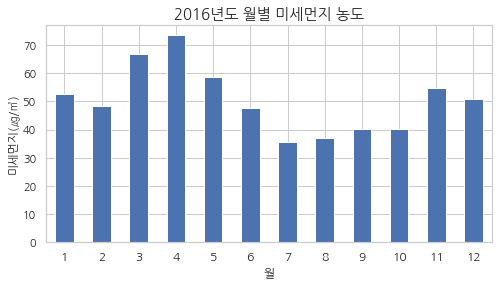

In [ ]:
# 2016년도 미세먼지 농도가 가장 높은 월
year = 2016
data[year].plot.bar(figsize=(8, 4), rot=0)
plt.title(f'{year}년도 월별 미세먼지 농도', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('미세먼지(㎍/㎥)', fontsize=12)
plt.grid(True)
plt.show()

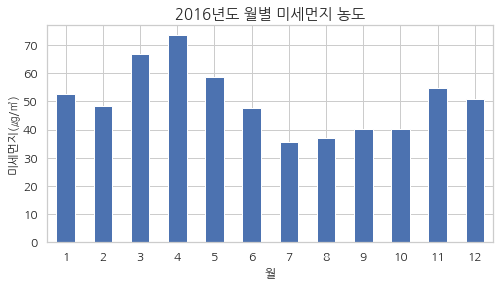

In [ ]:
year = 2016
data[year].plot.bar(figsize=(8, 4), rot=0, fontsize=12,
                    ylabel='미세먼지(㎍/㎥)', grid=True)
plt.title(f'{year}년도 월별 미세먼지 농도', fontsize=15)
plt.show()

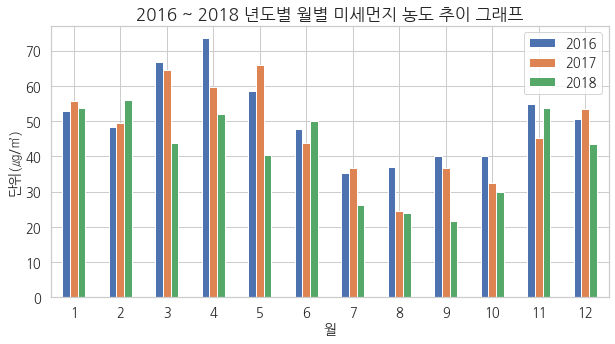

In [ ]:
#  2016 ~ 2018 년도별 월별 미세먼지 농도 추이 그래프
data.loc[:, 2016:2018].plot.bar(figsize=(10, 5), rot=0, fontsize=13)
plt.title('2016 ~ 2018 년도별 월별 미세먼지 농도 추이 그래프', fontsize=17)
plt.ylabel('단위(㎍/㎥)', fontsize=14)
plt.xlabel('월', fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.show()

In [ ]:
df_dust.head(2)

,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,2016,1,1,0.01,73.00,44.00
1,20160101,성북구,2016,1,1,0.01,71.00,45.00


In [ ]:
#  2016~2018년까지의 월별 미세먼지 평균 
data2 = df_dust.loc[df_dust['년']<=2018, ].groupby('월')['미세먼지(㎍/㎥)'].mean()
print(data2, data2.argmin(), data2.argmax(), sep='\n')

월
1    54.12
2    51.22
3    60.38
4    62.76
5    56.76
6    46.27
7    32.88
8    28.55
9    32.76
10   34.23
11   51.38
12   48.93
Name: 미세먼지(㎍/㎥), dtype: float64
7
3


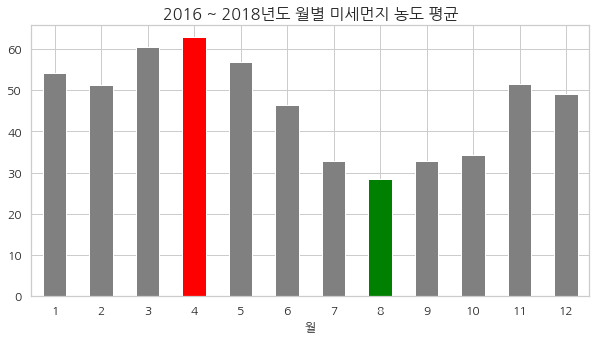

In [ ]:
# 3년 평균 미세먼지 농도가 가장 높은 월과 낮은 월 강조 그래프
colors = ['red' if x == 3 else 'green' if x == 7 else 'gray' for x in range(12)]
data2.plot.bar(color=colors, figsize=(10, 5), fontsize=12, rot=0)
plt.title('2016 ~ 2018년도 월별 미세먼지 농도 평균', fontsize=16)
#plt.xticks(fontsize=12, rotation=0)
plt.grid(True)
plt.show()

In [ ]:
# 2016~2018 미세먼지 농도 측정치 중 가장 큰 값은?
maxValue = df_dust.loc[df_dust['년']<=2018, '미세먼지(㎍/㎥)'].max()
maxValue

270.0

In [ ]:
#  2016~2018 미세먼지 농도 측정치 중 가장 큰 값을 갖는 정보
condition1 = df_dust['년']<=2018
condition2 = df_dust['미세먼지(㎍/㎥)'] == maxValue
df_dust.loc[condition1 & condition2, :]

,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
4405,20160423,신촌로,2016,4,23,0.01,270.00,46.00


In [ ]:
df_dust.head(3)

,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,2016,1,1,0.01,73.00,44.00
1,20160101,성북구,2016,1,1,0.01,71.00,45.00
2,20160101,송파구,2016,1,1,0.00,64.00,39.00


In [ ]:
# 측정소 중에서 평균 미세먼지 농도가 가장 낮은 곳은 어디일까?
data = df_dust.groupby('측정소명')['미세먼지(㎍/㎥)'].mean()
data.sort_values().head(1)

측정소명
도로변1(광화문역)   22.19
Name: 미세먼지(㎍/㎥), dtype: float64

In [ ]:
#  측정소 중에서 평균 미세먼지 농도가 가장 높은 곳은 어디일까?
data.sort_values(ascending=False).head(1)

측정소명
공사장2(신문로)   96.52
Name: 미세먼지(㎍/㎥), dtype: float64

In [ ]:
data = df_dust.groupby('측정소명')[['미세먼지(㎍/㎥)']].mean()
data.head(3)

,미세먼지(㎍/㎥)
측정소명,
강남구,41.25
강남구청1(SGA),26.69
강남구청2(랩코),26.19


In [ ]:
# Series를 사용한 경
data['미세먼지(㎍/㎥)'].plot.barh(figsize=(12, 22), grid=True)
plt.show()

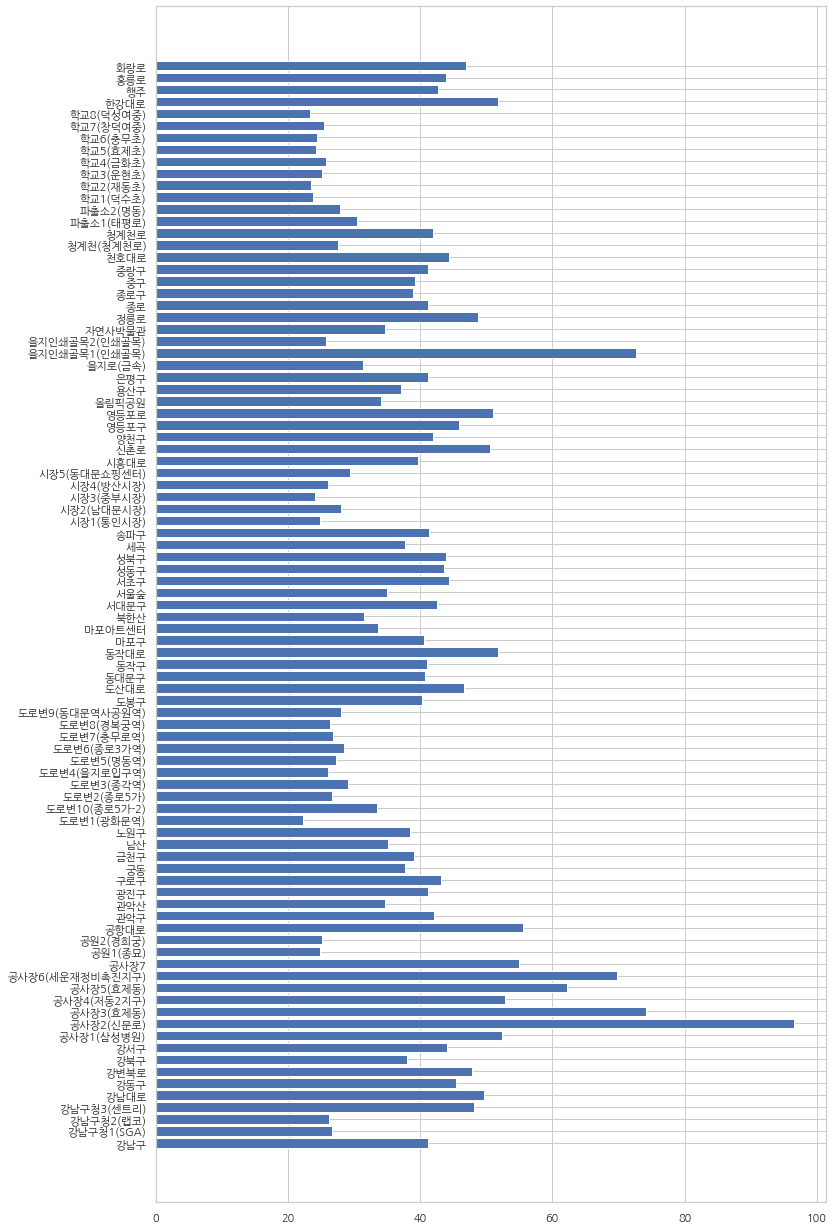

In [ ]:
# [3-64] 측정소별 미세먼지 농도 평균을 그래프로 살펴보자
plt.figure(figsize=(12, 22))
plt.barh(data.index, data['미세먼지(㎍/㎥)'])
plt.grid(True)
plt.show()